### Next Steps:
## All Dimensions:
#### - better thresholding for immobility, freezing
#### - step detection von elisa, alt.: end_index detection
#### - additional parameter (create class parameter?)
#### - how to add angles/parameters to steps
#### - export single bodyparts as one dataframe for neurokin

## 2D:
#### - Turning
#### - Filtering
#### Front Thresholds
#### - length of gait event?

## 3D:
#### -

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

# Walkthrough 2D

In [1]:
from gait3d.gaitanalysis import Recording2D

In [2]:
bot = Recording2D(filepath="196_F7-27_220826_OTT_Bottom_synchronizedDLC_resnet152_OT_BottomCam_finalSep20shuffle1_550000filtered.h5", recorded_framerate=30)
bot.metadata

{'recording_date': '220826',
 'animal': '196_F7-27',
 'paradigm': 'OTT',
 'cam': 'Bottom'}

In [3]:
bot.run(intrinsic_camera_calibration_filepath="/Users/kobel/Downloads/Intrinsic Calibrations/Bottom_checkerboard_intrinsic_calibration_results.p", 
        xy_offset=(136, 452), 
        video_filepath='/Users/kobel/Downloads/220826 Recording/196_F7-27_220826_OTT_Bottom_synchronizedDLC_resnet152_OT_BottomCam_finalSep20shuffle1_550000_filtered_labeled.mp4')
#bot.bodyparts['Back'].df.head()

interpolated LED5
interpolated TailBase
interpolated TailEnd
interpolated TaiMiddle
interpolated TailQuarterPost
interpolated TailQuarterAnt
interpolated Snout
interpolated EarLeft
interpolated EarRight
interpolated Genitals
interpolated HindPawRight
interpolated HindPawLeft
interpolated ForePawRight
interpolated ForePawLeft
interpolated IliacCrestLeft
interpolated IliacCrestRight
interpolated HipLeft
interpolated HipRight
interpolated HindKneeRight
interpolated HindKneeLeft
interpolated BackAnkleLeft
interpolated BackAngleRight
interpolated ShoulderLeft
interpolated ShoulderRight
interpolated ElbowLeft
interpolated ElbowRight
interpolated WristLeft
interpolated WristRight
interpolated MazeCornerOpenLeft
interpolated MazeCornerClosedLeft
interpolated MazeCornerOpenRight
interpolated MazeCornerClosedRight
interpolated centerofgravity
interpolated Front
interpolated Back


In [4]:
bot.bodyparts['Front'].df.head(50)

,x,y,likelihood,speed_cm_per_s,rolling_speed_cm_per_s,immobility
0,-0.001836,-0.000864,4.275184e-08,NaN,NaN,False
1,-0.000389,-0.000161,3.560810e-08,0.048244,0.032877,True
2,0.000578,0.000300,2.777445e-08,0.032141,0.026301,True
3,0.001131,0.000554,1.366569e-08,0.018247,0.021635,True
4,0.001334,0.000635,1.556761e-08,0.006571,0.014029,True
5,0.001254,0.000577,5.022245e-08,0.002973,0.010656,True
6,0.000955,0.000415,9.815813e-08,0.010215,0.010633,True
7,0.000502,0.000181,1.231392e-07,0.015275,0.013076,True
8,-0.000039,-0.000089,1.018195e-07,0.018132,0.015927,True
9,-0.000602,-0.000361,3.314923e-07,0.018783,0.016581,True


In [5]:
bot.get_freezing_bouts()

In [6]:
bot.run_gait_analysis()

In [7]:
bot.immobility_bout_df

,start_index,facing_towards_open_end,freezing_threshold_reached,duration_in_s,x_position
0,1,False,False,0.033333,0.001657
1,7,True,False,0.033333,0.001053
2,13,True,False,0.100000,3.173520
3,17,True,False,0.033333,3.236570
4,21,True,False,0.100000,3.331928
...,...,...,...,...,...
442,17754,False,False,0.033333,-0.001009
443,17756,False,False,0.033333,0.003582
444,17781,True,False,0.066667,32.286696
445,17831,True,False,0.066667,26.276575


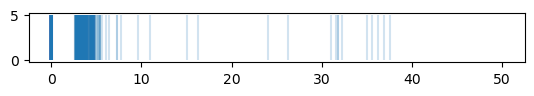

In [15]:
import matplotlib.pyplot as plt
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)

for event in bot.immobility_bouts:
    #if event.facing_towards_open_end:
    plt.vlines(event.x_position, 0, 5, alpha=0.2)
plt.show()
#bot.turns_to_closed_after_gait

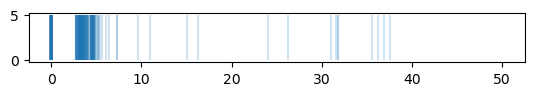

In [16]:
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)
for bout in bot.gait_disruption_bouts:
    plt.vlines(bout.dict['x_position'], 0, 5, alpha=0.2)
plt.show()

In [10]:
for bout in bot.freezing_of_gait_events:
    print(bout.duration)

1.6666666666666667
1.3
1.3
1.0333333333333334
1.5
1.1666666666666667
1.8666666666666667
1.1333333333333333
1.0333333333333334
2.933333333333333
2.0


### Walkthrough 3D

In [ ]:
from gait3d.gaitanalysis import Recording3D

In [ ]:
rec = Recording3D(filepath = "196_F7-27_220826_OTT.csv", recorded_framerate = 30)
rec.metadata

In [33]:
import numpy as np
sum([np.NaN, 3, 6])/3

nan

In [ ]:
rec.run()
rec.bodyparts["TailBase"].df.head()

In [ ]:
rec.get_freezing_bouts()
rec.freezing_bouts

In [ ]:
rec.run_gait_analysis()

In [ ]:
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)


for event in rec.turns_to_closed_after_gait:
    #if event.facing_towards_open_end:
    plt.vlines(event.x_position, 0, 5, alpha=0.5)
plt.show()

In [ ]:
rec.tracking_stability[['IliacCrestRight', 'HipRight', 'HindKneeRight', 'BackAngleRight', 'HindPawRight']]

In [ ]:
rec.tracking_stability[['IliacCrestLeft', 'HipLeft', 'HindKneeLeft', 'BackAnkleLeft', 'HindPawLeft']]

In [ ]:
rec.tracking_stability[['ShoulderRight', 'ElbowRight', 'WristRight', 'ForePawRight']]

In [ ]:
rec.tracking_stability[['ShoulderLeft', 'ElbowLeft', 'WristLeft', 'ForePawLeft']]

# To be implemented

In [ ]:
# 3D visualization
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Polygon, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.path as mpath
import matplotlib.patches as mpatches

def plot_frames_3d(index, bodyparts, paradigm=None):
    plt.close()
    scheme = [["TailBase", "TailQuarterAnt", "TaiMiddle", "TailQuarterPost", "TailEnd"]]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for bodypart in bodyparts.values():
        if bodypart.id not in set(['LED5', 'MazeCornerOpenRight', 'MazeCornerOpenLeft', 'MazeCornerClosedRight', 'MazeCornerClosedLeft']):
            if not math.isnan(bodypart.df.loc[index, 'x']):
                ax.text(bodypart.df.loc[index, 'x'], bodypart.df.loc[index, 'y'], bodypart.df.loc[index, 'z'], bodypart.id, size = 7)
                ax.scatter(bodypart.df.loc[index, 'x'], bodypart.df.loc[index, 'y'], bodypart.df.loc[index, 'z'], s=100, alpha = 1)
    connect_skeleton(scheme)
    ax.scatter([-25, -25, 55, 55, -25, -25, 55, 55], [-25, 55, 55, -25, -25, 55, 55, -25], [-25, -25, -25, -25, 55, 55, 55, 55], s=100, c='white', alpha=0)
    # the line above fixes axes
    
    if paradigm == 'OTR':
        sideright = Rectangle((0, 0), 35, 30, color='red', alpha=0.4)
        sideleft = Rectangle((0, 0), 35, 30, color='red', alpha=0.4)
        
    if paradigm == 'OTT':
        sideright = Polygon(np.array([[0, 0], [0, 30], [30, 0]]), closed=True, color='red', alpha=0.4)
        sideleft = Polygon(np.array([[0, 0], [0, 30], [30, 0]]), closed=True, color='red', alpha=0.4)
    
    if paradigm == 'OTE':
        Path = mpath.Path
        path_data = [
        (Path.MOVETO, (0, 0)),
        (Path.LINETO, (0, 30)),
        #(Path.CURVE3, (1.3, 27)),
        (Path.CURVE4, (13, 11.0)),
        (Path.CURVE4, (33.8, 2.1)), 
        (Path.CURVE4, (35, 1)),
        (Path.LINETO, (35, 0)),
        (Path.LINETO, (0, 0))]
        codes, verts = zip(*path_data)
        path = mpath.Path(verts, codes)
        sideright = mpatches.PathPatch(path, color='red', fill=True, alpha=0.4)
        sideleft = mpatches.PathPatch(path, color='red', fill=True, alpha=0.4)
    
    if paradigm != None:
        ax.add_patch(sideright)
        art3d.pathpatch_2d_to_3d(sideright, z=0, zdir='y')
        ax.add_patch(sideleft)
        art3d.pathpatch_2d_to_3d(sideleft, z=5, zdir='y')
        
        base = Rectangle((0, 0), 50, 5, color='gray', alpha=0.1)
        ax.add_patch(base)
        art3d.pathpatch_2d_to_3d(base, z=0, zdir='z')
        sideback = Rectangle((0, 0), 5, 30, color='gray', alpha=1)
        ax.add_patch(sideback)
        art3d.pathpatch_2d_to_3d(sideback, z=0, zdir='x')


    #https://stackoverflow.com/questions/35355930/matplotlib-figure-to-image-as-a-numpy-array
    ax.axis('off')
    fig.tight_layout(pad=0)
    ax.margins(0)
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return frame
    
    
def connect_skeleton(scheme):
    pass

def maze_shape(paradigm: str):
    pass

In [ ]:
a = plot_frames_3d(1, rec.bodyparts, 'OTT')

In [ ]:
video = iio.get_writer('196_F7-27_220826_OTT.mp4', fps = 30)

for i in range(5700, 6700):
    frame = plot_frames_3d(i, rec.bodyparts, 'OTT')
    video.append_data(frame)
video.close()

## Proof undistort points

In [ ]:
import imageio.v3 as iio
import cv2
import pickle


In [ ]:
df = pd.read_hdf("196_F7-27_220826_OTT_Bottom_synchronizedDLC_resnet152_OT_BottomCam_finalSep20shuffle1_550000filtered.h5")
df = df.drop('scorer', axis=1)
df.columns = df.iloc[0, :]+ '_' + df.iloc[1, :]
df = df.drop([0, 1], axis=0)
df = df.reset_index()
df = df.drop('index', axis=1)
df = df.astype(float)

In [ ]:
def load_intrinsic_camera_calibration(filepath_intrinsic_calibration: Path, xy_offset: Tuple[int, int]) -> None:
    with open(filepath_intrinsic_calibration, 'rb') as io:
        intrinsic_calibration = pickle.load(io)
    adjusted_intrinsic_calibration = intrinsic_calibration.copy()
    intrinsic_calibration_video_size = intrinsic_calibration['size']
    x_offset, y_offset = xy_offset[0], xy_offset[1]
    adjusted_K = intrinsic_calibration['K'].copy()
    adjusted_K[0][2] = adjusted_K[0][2] - x_offset
    adjusted_K[1][2] = adjusted_K[1][2] - y_offset
    return adjusted_K, intrinsic_calibration['D']

In [ ]:
image=iio.imread('/Users/kobel/Downloads/196_F7-27_220826_OTT_Bottom_synchronizedDLC_resnet152_OT_BottomCam_finalSep20shuffle1_550000_filtered_labeled.mp4', index=5700)

In [ ]:
size = (image.shape[1], image.shape[0])

In [ ]:
K, D = load_intrinsic_camera_calibration('/Users/kobel/Downloads/OneDrive_3_30/Bottom_checkerboard_intrinsic_calibration_results.p', xy_offset=(136, 452))

In [ ]:
dst_list = []
for bp in ['Snout', 'TailBase', 'HindPawLeft', 'HindPawRight', 'ForePawLeft', 'ForePawRight', 'WristLeft', 'WristRight', 'TailQuarterAnt', 'TaiMiddle', 'TailQuarterPost', 'TailEnd']:
    pt = df[[bp + '_x', bp + '_y']].copy().values
    newcameramtx, _ = cv2.getOptimalNewCameraMatrix(K, D, size, 1, size)
    dst = cv2.undistortPoints(pt, K, D, None, newcameramtx)
    dst = np.squeeze(dst)
    dst_list.append(dst)

In [ ]:
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
#plt.imshow(undistort_fisheye_image_for_inspection(image=image, K=K, D=D, size=size))
# issue: image is rectified, points are not -> plotting points over image makes no sense
for dst in dst_list:
    plt.scatter(dst[5700][0], dst[5700][1])
plt.show()